In [109]:
import main as m
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [110]:
PE = np.array([
    [1070, 830],
    [2750, 1300],
    [130, 2900],
    [2550, 3500]
])
PE = PE / 5

PS = np.array([
    [5, 5],
    [2000, 5],
    [5, 4000],
    [2000, 4000]
])
PS = PS / 5

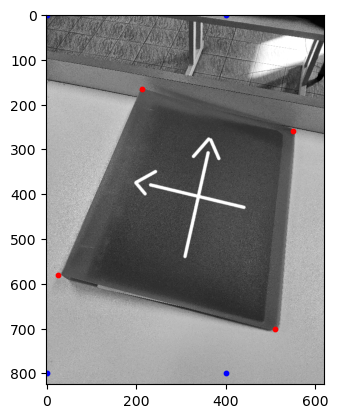

In [111]:
xe, ye = PE.T
xs, ys = PS.T

I = Image.open("images/Homographie.jpg", mode="r").convert('L')
Img = m.Compresser(np.array(I), 5)
plt.imshow(Img, cmap='gray')
plt.scatter(xe, ye, 10, color="red")
plt.scatter(xs, ys, 10, color="blue")
plt.show()

In [112]:
def Homogene(a, T):
    return (a[0]*T, a[1]*T, T)

In [113]:
def Projective(PE, PS):
    H = np.zeros((3,3))
    MS = []
    for x in PS:
        CoordH = Homogene(x, 1)
        MS += [CoordH[i] for i in range(3)]
    ME = []
    for x in PE:
        ME += []
    #return X

In [114]:
def ComputeHomography(PE, PS):
    S = []
    for i in range(4):
        xe, ye = PE[i][0], PE[i][1]
        xs, ys = PS[i][0], PS[i][1]
        print(xe, ye)
        print(xs, ys)
        S.append([xe, ye, 1, 0, 0, 0, -xe*xs, -ye*xs, -xs])
        S.append([0, 0, 0, xe, ye, 1, -xe*ys, -ye*ys, -ys])
    A = np.array(S)
    U, S = np.linalg.eig(A.T@A)
    mini = np.argmin(U)
    Amin = S[:,mini]
    H = np.reshape(Amin, (3,3))
    H=H/H[2,2]
    return H

In [115]:
H = ComputeHomography(PE,PS)
print(H)

214.0 166.0
1.0 1.0
550.0 260.0
400.0 1.0
26.0 580.0
1.0 800.0
510.0 700.0
400.0 800.0
[[ 1.12017817e+00  5.09827666e-01 -3.23260769e+02]
 [-7.49565567e-01  2.67902913e+00 -2.83223034e+02]
 [-3.51641915e-04  9.88015753e-04  1.00000000e+00]]


In [116]:
def Projection(I, H):
    x, y = I.shape
    S = np.zeros((x,y))
    for i in range(x):
        for j in range(y):
            ECoord = np.array([[i], [j], [1]])
            SCoord = np.dot(H, ECoord)
            xi = int(SCoord[0][0])
            yi = int(SCoord[1][0])
            if xi > 0 and xi < x and yi > 0 and yi < y:
                S[i,j] = I[xi,yi]
    return S

In [117]:
Image = Projection(Img, H)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


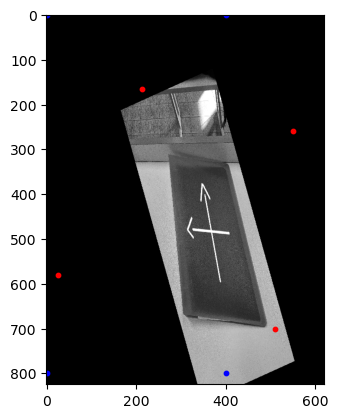

In [118]:
print(Image)
plt.imshow(Image, cmap='gray')
plt.scatter(xe, ye, 10, color="red")
plt.scatter(xs, ys, 10, color="blue")
plt.show()